## CDPT model from Arredondo & Billen, 2016

### contents

figures .. are reproduced.

In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# utility functions

# point ot a line
def compute_point_to_line (temperature, depth, T, P, W, slope, by_depth, is_negative, is_vertical):
    '''
    In this approach, we define a transition as a solid line and a range.
    The solid line is a rigid boundary for the new phase.
    While the range is a width of transition. 
    '''
    deviation = 0.0
    if (is_vertical):
        deviation = temperature - T
    else:
        deviation = depth - P - slope * (temperature - T)
    # In this approach, a transition must has a direction in defination
    # We need an opposite direction when the transition defined from higher pressure to lower pressure.
    if (is_negative):
        deviation *= -1.0
    # Deviation must be smaller than 2*W, value for function would be 0.04 there.
    is_in = (deviation > -2.0 * W)
    return [is_in, deviation]


# phases
def compute_phases_properties(phase_index, temperature, depth, 
                              densities, transition_depths, transition_temperatures,\
                              transition_widths, transition_slopes):
    pressure_depth_derivative = 3400 * 10.0  #
    
    index_410 = 0 
    index_520 = 1 
    index_560 = 2 
    index_660 = 3 
    index_660_gt = 4 
    index_660_gt1 = 5 
    index_660_gt_combined = 6 
    
    ## initiate varibles 
    function_value = 0.0
    phase_index_pyrolite = 0
    
    
    ## 410
    d410 = transition_depths[index_410]
    T410 = transition_temperatures[index_410]
    W410 = transition_widths[index_410]
    slope410 = transition_slopes[index_410]
    result410 = compute_point_to_line(temperature, depth, T410, d410, W410,\
                                      slope410/pressure_depth_derivative, True, False, False)
    
    ## 520
    d520 = transition_depths[index_520]
    T520 = transition_temperatures[index_520]
    W520 = transition_widths[index_520]
    slope520 = transition_slopes[index_520]
    result520 = compute_point_to_line(temperature, depth, T520, d520, W520,\
                                      slope520/pressure_depth_derivative, True, False, False)
        
    ## 560
    d560 = transition_depths[index_560]
    T560 = transition_temperatures[index_560]
    W560 = transition_widths[index_560]
    slope560 = transition_slopes[index_560]
    result560 = compute_point_to_line(temperature, depth, T560, d560, W560,\
                                   slope560/pressure_depth_derivative, True, False, False)
        
    ## 660
    d660 = transition_depths[index_660]
    T660 = transition_temperatures[index_660]
    W660 = transition_widths[index_660]
    slope660 = transition_slopes[index_660]
    result660 = compute_point_to_line(temperature, depth, T660, d660, W660,\
                                      slope660/pressure_depth_derivative, True, False, False)
        
    ## 660 for gt, part 0
    d660_gt = transition_depths[index_660_gt]
    T660_gt = transition_temperatures[index_660_gt]
    W660_gt = transition_widths[index_660_gt]
    slope660_gt = transition_slopes[index_660_gt]
    result660_gt = compute_point_to_line(temperature, depth, T660_gt, d660_gt, W660_gt,\
                                         slope660_gt/pressure_depth_derivative, True, False, False)
        
    ## 660 for gt, part 1 
    d660_gt1 = transition_depths[index_660_gt1]
    T660_gt1 = transition_temperatures[index_660_gt1]
    W660_gt1 = transition_widths[index_660_gt1]
    slope660_gt1 = transition_slopes[index_660_gt1]
    result660_gt1 = compute_point_to_line(temperature, depth, T660_gt1, d660_gt1, W660_gt1,\
                                          slope660_gt1/pressure_depth_derivative, True, False, False)
        
    ## 660 for gt, combined
    ##  phase_index_660 = 0
    d660_gt_combined = transition_depths[index_660_gt_combined]
    T660_gt_combined = transition_temperatures[index_660_gt_combined]
    W660_gt_combined = transition_widths[index_660_gt_combined]
    slope660_gt_combined = transition_slopes[index_660_gt_combined]
    result660_gt_combined = compute_point_to_line(temperature, depth, T660_gt_combined, d660_gt_combined,\
                                                  W660_gt_combined, slope660_gt_combined/pressure_depth_derivative,\
                                                  True, False, False)
    
    
    if (result410[0]):
        ## 410 for pyrolite
        if(phase_index == index_410):
            function_value += 0.5*(1.0 + np.tanh(result410[1]/W410))
    
    if (result520[0]):
        # 520 for pyrolite
        if(phase_index == index_520):
            function_value += 0.5*(1.0 + np.tanh(result520[1]/W520))
    
    if (result560[0]):
        # 560 for pyrolite, Gt -> CaPv + Gt
        if(phase_index == index_560):
            function_value += 0.5*(1.0 + np.tanh(result560[1]/W560))
    
    if (result660[0]):
        # 660 for pyrolite, rw -> brg + fp
        if(phase_index == index_660):
            function_value += 0.5*(1.0 + np.tanh(result660[1]/W660))
    
    if (result660_gt[0] and temperature < T660_gt):
        # 660 for pyrolite, gt -> il
        if(phase_index == index_660_gt):
            function_value += 0.5*(1.0 + np.tanh(result660_gt[1]/W660_gt))
    
    if (result660_gt1[0] and temperature < T660_gt1):
        # 660 for pyrolite, il -> brg
        if(phase_index == index_660_gt1):
            function_value += 0.5*(1.0 + np.tanh(result660_gt1[1]/W660_gt1))
    
    if (result660_gt_combined[0] and temperature >= T660_gt_combined):
      # 660 for pyrolite combined, at higher temperature, gt -> brg
        if(phase_index == index_660_gt_combined):
            function_value += 0.5*(1.0 + np.tanh(result660_gt_combined[1]/W660_gt_combined))
    
    return function_value

### Inputs for one phase transition include the depths, temperatures, widths, slopes of the transition.

In [11]:
# Compute composition density with a constant temperature
# values for phase transition properties
number_of_phase_transitions = 7
transition_depths = [410e3, 520e3, 560e3, 670e3, 670e3, 670e3, 670e3]
transition_temperatures = [1662.0, 1662.0, 1662.0, 1662.0, 1662.0, 1662.0, 1662.0]
transition_widths = [5e3, 5e3, 5e3, 5e3, 5e3, 5e3, 5e3]
transition_slopes = [4e6, 4.1e6, 4e6, -2e6, 4e6, -3.1e6, 1.3e6]
# values of these densities are not important, the difference is
phase_densities = [3300.0, 3394.4, 3442.1, 3453.2, 3617.6, 3691.5, 3774.7, 3929.1]

n = 100
temperature = 1620.0
depths = np.linspace(0, 2890e3, n)
densities = np.zeros(n)
phase_function_values = np.zeros(number_of_phase_transitions)

j = 0
for depth in depths:
    density = phase_densities[0]
    for i in range(number_of_phase_transitions):
        phase_function_values[i] = compute_phases_properties(i, temperature, depth, phase_densities, transition_depths,
                                                  transition_temperatures, transition_widths, transition_slopes)
    for i in range(number_of_phase_transitions):
        density += phase_function_values[i] * (phase_densities[i+1] - phase_densities[i])
    densities[j] = density
    j += 1

densities:  [3300.         3300.         3300.         3300.         3300.
 3300.         3300.         3300.         3300.         3300.
 3300.         3300.         3300.         3300.         3376.48154181
 3394.39981226 3394.4        3394.4        3441.40060532 3447.19331054
 3453.19988888 3453.2        3453.2        3609.72905492 3774.69596539
 3774.69999997 3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7        3774.7        3774.7        3774.7        3774.7
 3774.7  

Text(0.5, 1.0, 'Densities in First Principle Model')

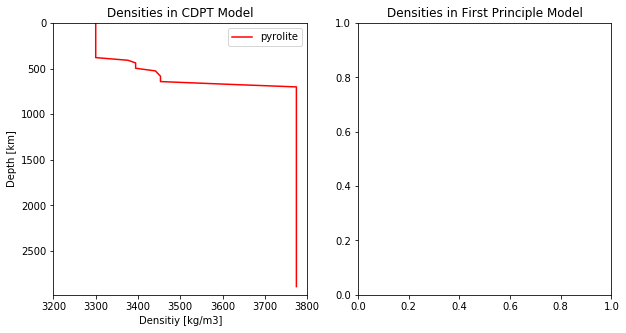

In [20]:
# plot density profile, compare with output from fisrt principal observation and seismic observation

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(densities, depths/1e3, 'r', label='pyrolite')
axs[0].set_xlim([3200, 3800])
axs[0].set_ylim([0, 2980])
axs[0].set_ylabel('Depth [km]')
axs[0].set_xlabel('Densitiy [kg/m3]')
axs[0].invert_yaxis()
axs[0].set_title("Densities in CDPT Model")
axs[0].legend()
axs[1].set_title("Densities in First Principle Model")